# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     879.4
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.31e-40
Time:                        18:53:05   Log-Likelihood:                -1.2602
No. Observations:                  50   AIC:                             10.52
Df Residuals:                      46   BIC:                             18.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9909      0.088     56.599      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49786927  4.98454114  5.43117234  5.80979223  6.10252464  6.30452486
  6.42477561  6.48461118  6.51421233  6.54764762  6.61727604  6.74843058
  6.95525603  7.23838504  7.58483421  7.97013719  8.36236447  8.72736926
  9.03439775  9.26114185  9.39740438  9.44677438  9.42603751  9.36241816
  9.28910657  9.23980579  9.24319436  9.31821448  9.47095987  9.69367462
  9.96602743 10.258452   10.53700467 10.76894129 10.928097   10.99918501
 10.98030818 10.88327076 10.73163893 10.55686896 10.39313906 10.27173396
 10.21590494 10.2370497  10.33283976 10.48760302 10.67489862 10.86186114
 11.01460026 11.10376886]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.09810947 10.9573309  10.70156011 10.37666393 10.04301924  9.76073059
  9.57491455  9.50465357  9.53832393  9.63644165]


## Plot comparison

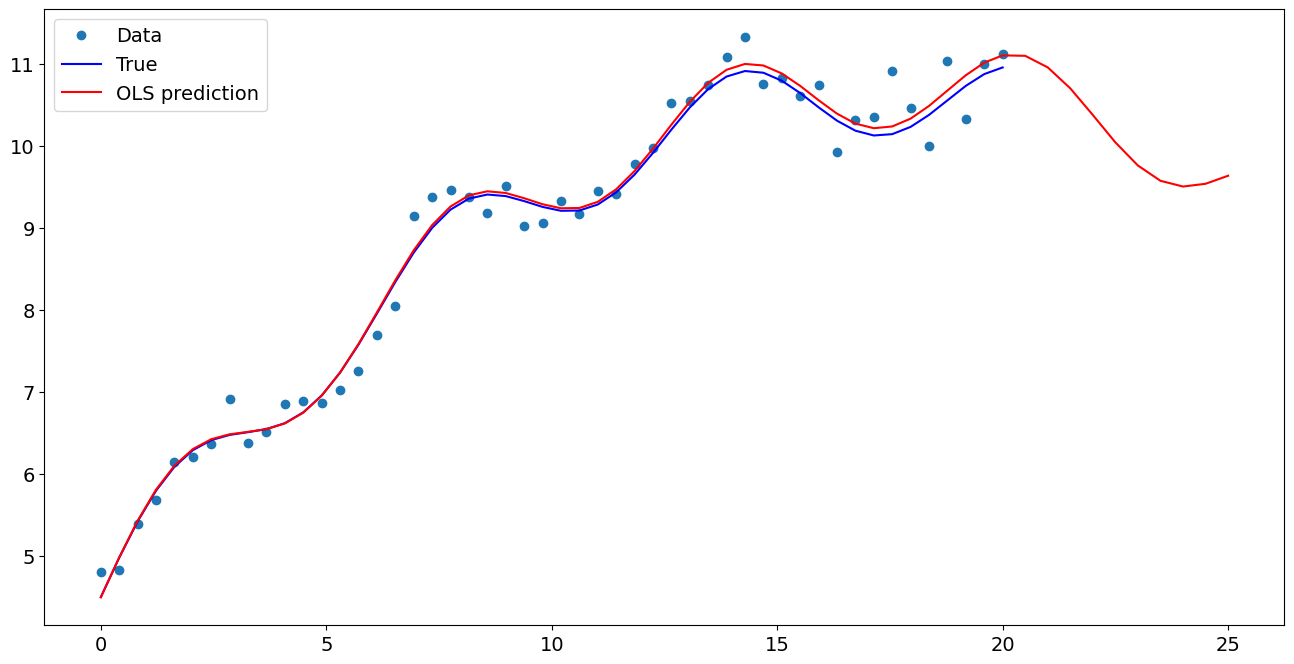

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.990906
x1                  0.504082
np.sin(x1)          0.513231
I((x1 - 5) ** 2)   -0.019721
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.098109
1    10.957331
2    10.701560
3    10.376664
4    10.043019
5     9.760731
6     9.574915
7     9.504654
8     9.538324
9     9.636442
dtype: float64